In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes
import pandas

diabetes = load_diabetes()

print(diabetes.DESCR)

tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela.head()


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
#VARIAVEL A SER PREDITA
tabela['y'] = diabetes.target
tabela.head(15)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [3]:
#Calculo por sexo
X = tabela['sex']
#PEGANDO PARA TREINAMENTO TODOS OS DADOS EXECETO OS 20 ULTIMOS
X_treinamento = X[:-20].array.to_numpy().reshape(-1,1)
X_teste = X[-20:].array.to_numpy().reshape(-1,1)

#PROGRESSAO DA DOENCA DEPOIS DE UM ANO DE MEDICAO
y = tabela['y']
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)


regr = linear_model.LinearRegression()

regr.fit(X_treinamento, y_treinamento)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto b0
print('Coeficiente b0: \n', regr.intercept_)

Coeficiente b1: 
 [59.78480979]
Coeficiente b0: 
 153.37111396947168


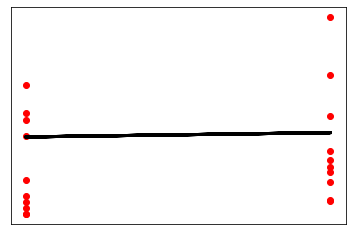

In [8]:
# Predição
diabetes_y_pred = regr.predict(X_teste)

plt.scatter(X_teste,y_teste,  color='red')
plt.plot(X_teste, diabetes_y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
#Calculando o erro médio
print('Erro médio (sexo): ', sum(abs(y_teste-diabetes_y_pred.reshape(-1,1))))

Erro médio (sexo):  [1142.55880778]


In [59]:
#Calculo por pressão arterial média bp
X = tabela['bp']
#PEGANDO PARA TREINAMENTO TODOS OS DADOS EXECETO OS 20 ULTIMOS
X_treinamento = X[:-20].array.to_numpy().reshape(-1,1)
X_teste = X[-20:].array.to_numpy().reshape(-1,1)

#PROGRESSAO DA DOENCA DEPOIS DE UM ANO DE MEDICAO
y = tabela['y']
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)


regr = linear_model.LinearRegression()

regr.fit(X_treinamento, y_treinamento)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto b0
print('Coeficiente b0: \n', regr.intercept_)


Coeficiente b1: 
 [709.19471785]
Coeficiente b0: 
 153.13724802041313


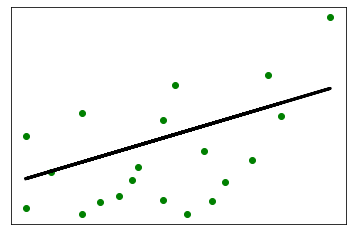

In [61]:
# Predição bp
diabetes_y_pred = regr.predict(X_teste)

plt.scatter(X_teste,y_teste,  color='green')
plt.plot(X_teste, diabetes_y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [57]:
#Calculando o erro médio
print('Erro médio (pressão arterial:) ', sum(abs(y_teste-diabetes_y_pred.reshape(-1,1))))

Erro médio (pressão arterial:)  [1128.0700219]


In [66]:
X = tabela [['sex', 'bp']]
train_x = X[:-20]

y = tabela['y']
train_y = y[:-20]
regr = linear_model.LinearRegression ()
regr.fit (train_x, train_y)

test_x = X[-20:]
test_y = y[-20:]

print ('Intercept:', regr.intercept_)
print ('Coeficientes:', regr.coef_)



Intercept: 153.114824872756
Coeficientes: [-104.64733631  732.64120655]


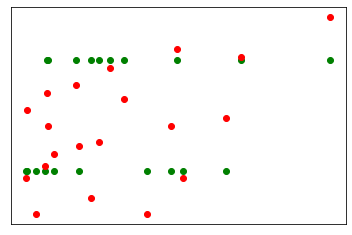

In [67]:
diabetes_y_pred = regr.predict(test_x)

plt.scatter(test_y,test_x.iloc[:,0].values, color= 'green')

plt.scatter(test_y, test_x.iloc[:,1].values, color = 'red')


#plt.scatter(test_x,test_y,  color='green')
#plt.plot(test_x.iloc[:,1], diabetes_y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [68]:
#Calculando o erro médio
print('Erro médio (sexo, bp): ', sum(abs(test_y-diabetes_y_pred)))

Erro médio (sexo, bp):  1128.0700218977781
